In [2]:
#Start with loading all necessary libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from common_words import clean_tweet

df_tweets = pd.read_csv('../sources/merged_twitter_text_county.csv')

def word_cloud(data, stance, year):
    df = data[(data["stance"] == stance) & (df_tweets["fyDeclared"] == year)]

    tweets_list = df["content"].to_numpy()

    cleaned_tweets = [clean_tweet(tw) for tw in tweets_list]

    #Join element strings of tweets list into one long string
    text = " ".join(cleaned_tweets)

    stopwords = set(STOPWORDS)
    stopwords.update(["said", "u", "know", "make", "thing", "much", "want", "say", "will",
                "re", "come", "going", "doesn", 'goparkansas', 'don', 'nal',
                "see", "via", "amp", "wait", 'almost', 'im', 'wouldn'])  # add additional stop words as needed

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=600, height=400, max_words=40, background_color='white',\
     stopwords=stopwords, collocations = True).generate(text)

    # # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()

    #this saves the wordcloud generated into an image file
    plt.savefig(f'wordcloud_{stance}_{year}.png')
    plt.show()


ModuleNotFoundError: No module named 'common_words'

In [ ]:
/home/jonathanjuarez/capp30122/30122-project-hot-or-not/main/images/wordcloud_believer_2009.png

In [20]:
def word_cloud_incident(data, incident, year):
    df = data[(data['incidentType'] == incident) & (df_tweets["fyDeclared"] == year)]

    tweets_list = df["content"].to_numpy()

    cleaned_tweets = [clean_tweet(tw) for tw in tweets_list]

    #Join element strings of tweets list into one long string
    text = " ".join(cleaned_tweets)

    stopwords = set(STOPWORDS)
    stopwords.update(["said", "u", "know", "make", "thing", "much", "want", "say", "will",
                "re", "come", "going", "doesn", 'goparkansas', 'don', 'nal',
                "see", "via", "amp", "wait", 'almost', 'im', 'wouldn'])  # add additional stop words as needed

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=600, height=400, max_words=40, background_color='white', stopwords=stopwords, collocations = True).generate(text)

    # # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()

    #this saves the wordcloud generated into an image file
    plt.savefig(f'wordcloud_{incident}_{year}.png')
    plt.show()

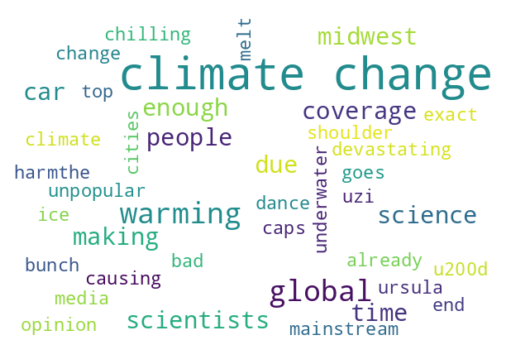

In [18]:
word_cloud_incident(df_tweets, "Fire", 2019)

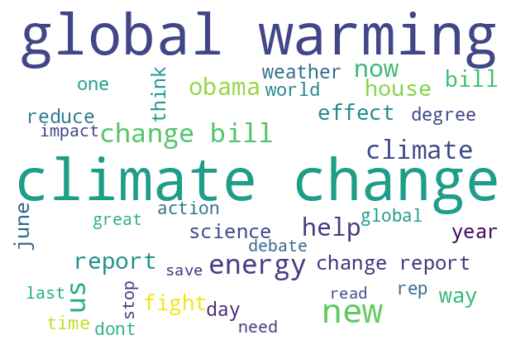

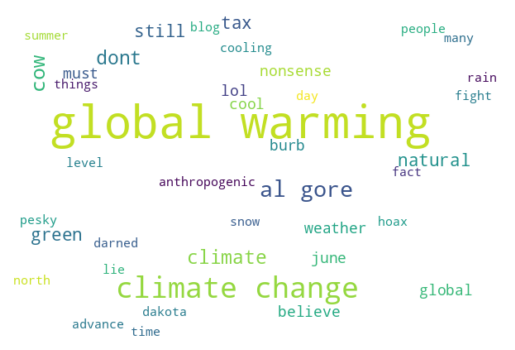

In [21]:
word_cloud(df_tweets, "believer", 2009)
word_cloud(df_tweets, "denier", 2009)

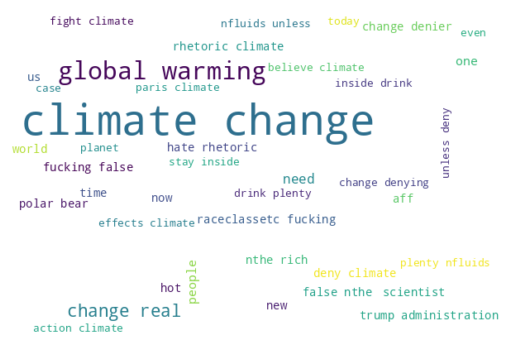

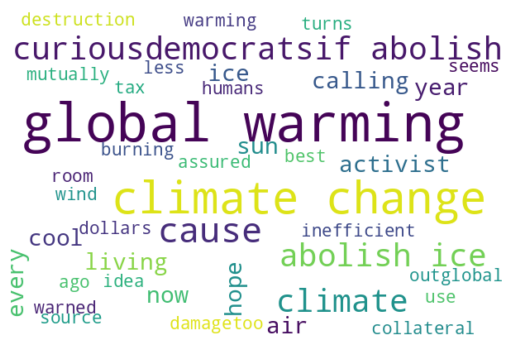

In [22]:
word_cloud(df_tweets, "believer", 2018)
word_cloud(df_tweets, "denier", 2018)

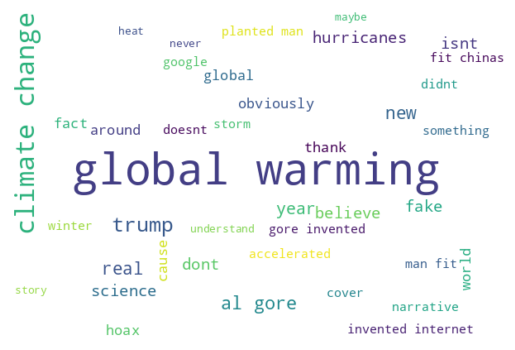

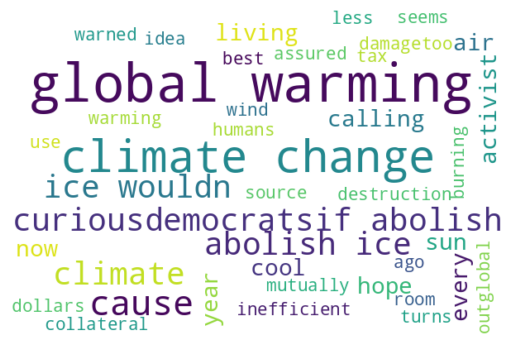

In [16]:
word_cloud(df_tweets, "denier", 2017)
word_cloud(df_tweets, "denier", 2018)

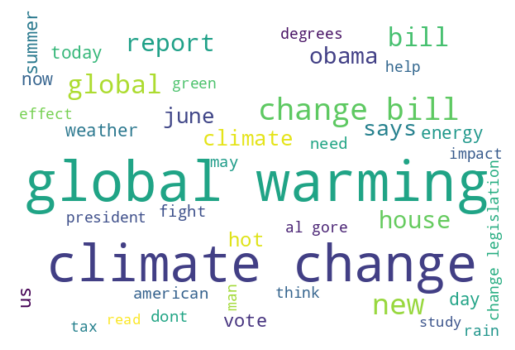

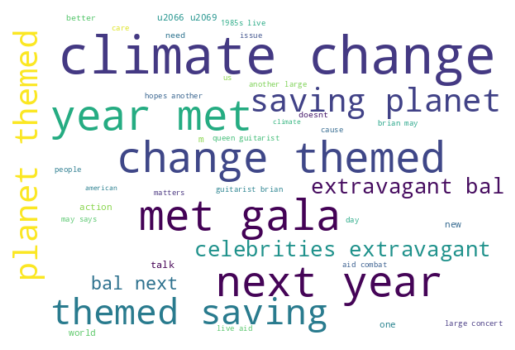

In [23]:
word_cloud(df_tweets, "neutral", 2009)
word_cloud(df_tweets, "neutral", 2018)